<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/GrowthDJ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url= "https://raw.githubusercontent.com/victoriamaccari/proyecto/master/GrowthDJ.csv"

In [3]:
df= pd.read_csv(url)

In [4]:
df.head(10)

,Unnamed: 0,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,6,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,7,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,8,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,9,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,10,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  121 non-null    int64  
 1   oil         121 non-null    object 
 2   inter       121 non-null    object 
 3   oecd        121 non-null    object 
 4   gdp60       116 non-null    float64
 5   gdp85       108 non-null    float64
 6   gdpgrowth   117 non-null    float64
 7   popgrowth   107 non-null    float64
 8   invest      121 non-null    float64
 9   school      118 non-null    float64
 10  literacy60  103 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.5+ KB


In [6]:
#elimino columna Unnamed:0
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [7]:
df.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [8]:
#Comprobar si hay valores perdidos
pd.isnull(df).any()



oil           False
inter         False
oecd          False
gdp60          True
gdp85          True
gdpgrowth      True
popgrowth      True
invest        False
school         True
literacy60     True
dtype: bool

In [9]:
#Total de valores perdidos por columna
df.isnull().sum()

oil            0
inter          0
oecd           0
gdp60          5
gdp85         13
gdpgrowth      4
popgrowth     14
invest         0
school         3
literacy60    18
dtype: int64

In [10]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
df.fillna(method='ffill', inplace=True)

In [11]:
#Compruebo que no queden valores perdidos
pd.isnull(df).any()

oil           False
inter         False
oecd          False
gdp60         False
gdp85         False
gdpgrowth     False
popgrowth     False
invest        False
school        False
literacy60    False
dtype: bool

In [12]:
#Comprobar si hay valores duplicados, condicion para que muestre los true
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

In [13]:
#Observo los datos
import matplotlib.pyplot as plt


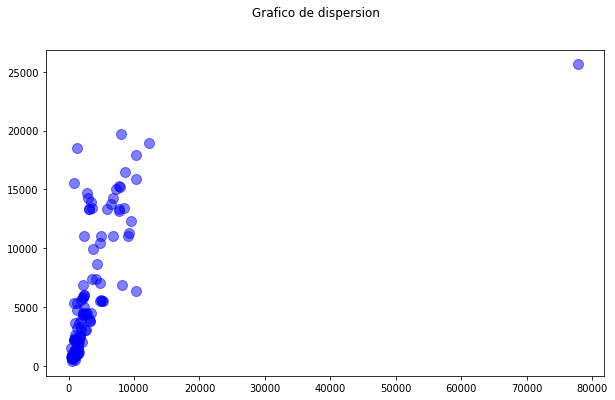

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Grafico de dispersion')

ax.scatter(df['gdp60'], df['gdp85'],
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

# Show the plot
plt.show()

In [15]:
summary = df.describe()
print(summary)

              gdp60         gdp85  ...      school  literacy60
count    121.000000    121.000000  ...  121.000000  121.000000
mean    3587.983471   5857.661157  ...    5.537190   48.256198
std     7349.898268   5600.090048  ...    3.502693   35.646302
min      383.000000    412.000000  ...    0.400000    1.000000
25%      978.000000   1237.000000  ...    2.400000   15.000000
50%     1939.000000   3775.000000  ...    4.900000   39.000000
75%     3766.000000   9903.000000  ...    8.200000   84.000000
max    77881.000000  25635.000000  ...   12.100000  100.000000

[8 rows x 7 columns]


(array([ 1.,  5., 14., 16., 30., 21., 17., 10.,  4.,  3.]),
 array([-0.9 ,  0.11,  1.12,  2.13,  3.14,  4.15,  5.16,  6.17,  7.18,
         8.19,  9.2 ]),
 <a list of 10 Patch objects>)

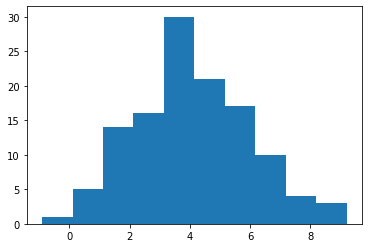

In [16]:
plt.hist(df["gdpgrowth"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc5c2bdb00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc5c2ce550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc5c2cefd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc5c2cec50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc5c2bde10>,
  <matplotlib.lines.Line2D at 0x7fcc5c2ce1d0>]}

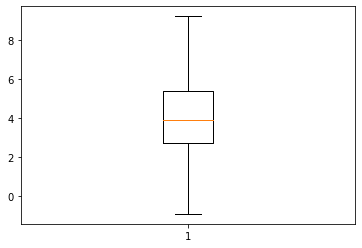

In [17]:
plt.boxplot(df['gdpgrowth'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc5c22a080>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc5c22aa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc5c237550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc5c2371d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc5c22a390>,
  <matplotlib.lines.Line2D at 0x7fcc5c22a710>]}

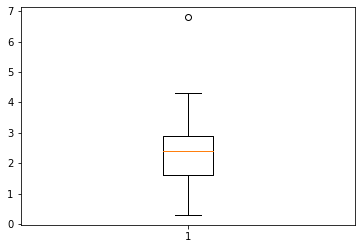

In [18]:
plt.boxplot(df['popgrowth'])

In [19]:
#Deteccion de outliers
#IQR para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gdp60         2788.0
gdp85         8666.0
gdpgrowth        2.7
popgrowth        1.3
invest          12.1
school           5.8
literacy60      69.0
dtype: float64


In [20]:
BI=(df < (Q1 - 1.5 * IQR)) 
print(BI)

     gdp60  gdp85  gdpgrowth  inter  ...   oecd    oil  popgrowth  school
0    False  False      False  False  ...  False  False      False   False
1    False  False      False  False  ...  False  False      False   False
2    False  False      False  False  ...  False  False      False   False
3    False  False      False  False  ...  False  False      False   False
4    False  False      False  False  ...  False  False      False   False
..     ...    ...        ...    ...  ...    ...    ...        ...     ...
116  False  False      False  False  ...  False  False      False   False
117  False  False      False  False  ...  False  False      False   False
118  False  False      False  False  ...  False  False      False   False
119  False  False      False  False  ...  False  False      False   False
120  False  False      False  False  ...  False  False      False   False

[121 rows x 10 columns]


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
BS=(df > (Q3 + 1.5 * IQR))
print(BS)

     gdp60  gdp85  gdpgrowth  inter  invest  literacy60   oecd    oil  \
0    False  False      False  False   False       False  False  False   
1    False  False      False  False   False       False  False  False   
2    False  False      False  False   False       False  False  False   
3    False  False      False  False   False       False  False  False   
4    False  False      False  False   False       False  False  False   
5    False  False      False  False   False       False  False  False   
6    False  False      False  False   False       False  False  False   
7    False  False      False  False   False       False  False  False   
8    False  False      False  False   False       False  False  False   
9    False  False      False  False   False       False  False  False   
10   False  False      False  False   False       False  False  False   
11   False  False      False  False   False       False  False  False   
12   False  False      False  False   False       F

In [22]:
#Quito los outliers
df_out = df[~((df < (Q1 - 1.5 * IQR))).any(axis=1)]
df_out.shape

(121, 10)

In [23]:
#Quito los outliers
df_out2 = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out2.shape

(110, 10)

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc5af2b0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc5af2bac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc5af34588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc5af34208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc5af2b3c8>,
  <matplotlib.lines.Line2D at 0x7fcc5af2b748>]}

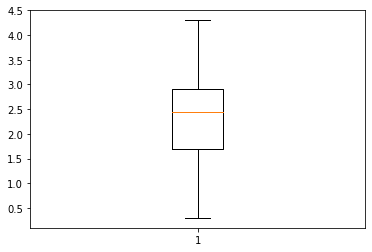

In [24]:
#Compruebo que en esta columna ya no hay valores outliers
plt.boxplot(df_out2['popgrowth'])

In [25]:
#Se eliminaron 11 filas con valores outliers
summary = df_out2.describe()
print(summary)

             gdp60         gdp85   gdpgrowth   popgrowth      invest  \
count   110.000000    110.000000  110.000000  110.000000  110.000000   
mean   2364.263636   5023.263636    4.211818    2.250909   17.682727   
std    1963.342356   4890.696790    1.958268    0.908143    7.793209   
min     383.000000    412.000000   -0.900000    0.300000    4.100000   
25%     917.000000   1193.750000    2.825000    1.700000   12.000000   
50%    1620.500000   3150.000000    4.050000    2.450000   17.150000   
75%    3145.000000   6042.000000    5.500000    2.900000   23.350000   
max    7938.000000  19723.000000    9.200000    4.300000   36.900000   

           school  literacy60  
count  110.000000  110.000000  
mean     5.179091   44.272727  
std      3.393007   34.556405  
min      0.400000    1.000000  
25%      2.325000   13.250000  
50%      4.450000   32.000000  
75%      7.975000   74.500000  
max     12.100000  100.000000  


In [26]:
#Bucle para eliminar valores outliers, no funciono falta modificar el exclude
def boxplot_outlier_removal(df):
  for col in df.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (df[col] > Q1 - 1.5 * IQR) & (df[col] < Q3 + 1.5 *IQR)
            df = df[filter_]
  after = len(df)
  diff = before-after
  percent = diff/before*100
  print('{} ({:.2f}%) outliers removed'.format(diff, percent))
  return df


In [57]:
#normalizacion
from sklearn import preprocessing
data = df_out2.iloc[:,[3,4,5,6,7,8,9]].values #normalizar antes de seguir
datanorm = (data-data.min())/(data.max()-data.min())
print(datanorm)



[[1.26034912e-01 2.21654947e-01 2.88989500e-04 1.77449693e-04
  1.26749781e-03 2.73779526e-04 5.52629044e-04]
 [8.05570906e-02 5.94152272e-02 8.61898509e-05 1.52099737e-04
  3.39689412e-04 1.36889763e-04 2.99129483e-04]
 [5.66267320e-02 5.43452360e-02 1.57169728e-04 1.67309711e-04
  5.93188974e-04 1.36889763e-04 2.99129483e-04]
 [4.86668458e-02 1.86165008e-01 4.81649167e-04 2.07869640e-04
  1.48043744e-03 1.92659667e-04 2.99129483e-04]
 [2.68658835e-02 4.34954548e-02 1.92659667e-04 9.12598421e-05
  6.89518807e-04 6.59098860e-05 1.47029746e-04]
 [3.83240637e-02 3.36596718e-02 1.06469816e-04 1.31819772e-04
  3.04199474e-04 6.59098860e-05 7.55428693e-04]
 [4.51178519e-02 1.11078438e-01 3.34619421e-04 1.52099737e-04
  6.94588798e-04 2.18009623e-04 1.00892825e-03]
 [4.25321564e-02 4.00478607e-02 1.21679789e-04 1.31819772e-04
  5.77979000e-04 1.16609798e-04 4.00529307e-04]
 [4.60811503e-02 2.34689894e-02 0.00000000e+00 1.41959754e-04
  3.95459316e-04 6.59098860e-05 3.49829395e-04]
 [5.120184

In [61]:
#algortimo aglomerativo jerarquico - dendrogramas
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

#datos=df_out2.iloc[:,[3,4,5,6,7,8]].values
#datos


In [62]:
clustering_jerarquico= sch.linkage(datanorm, 'ward')

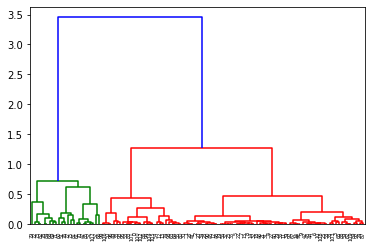

In [63]:
dendrogram=sch.dendrogram(clustering_jerarquico)

In [70]:
#realizo el corte en 1
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(clustering_jerarquico, t=1, criterion='distance')

In [71]:
print(clusters)

[2 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 3 2 2 1 1 2 2 2 3 1 3 3 1 1 3 2 2 3 1 3 1 1 1 1 1 1
 2 1 1 1 1 1 2 1 1 2 1 1 2 3 3 3 3 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 1 3 3]


In [75]:
df_out2['clustering jerarquico']=clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_out2.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering_jerarquico
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0,2
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0,3
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0,3
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,5.0,3
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0,3
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0,3
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0,3
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0,3
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0,3
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0,3


In [44]:
from sklearn.cluster import AgglomerativeClustering
 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
categorias = cluster.fit_predict(data)
print(categorias)

[2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 2 2 0 0 2 2 2 1 0 1 1 0 0 1 2 2 1 0 1 0 0 0 0 0 0
 2 0 0 0 0 0 2 0 0 2 0 0 2 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 0 1 1]


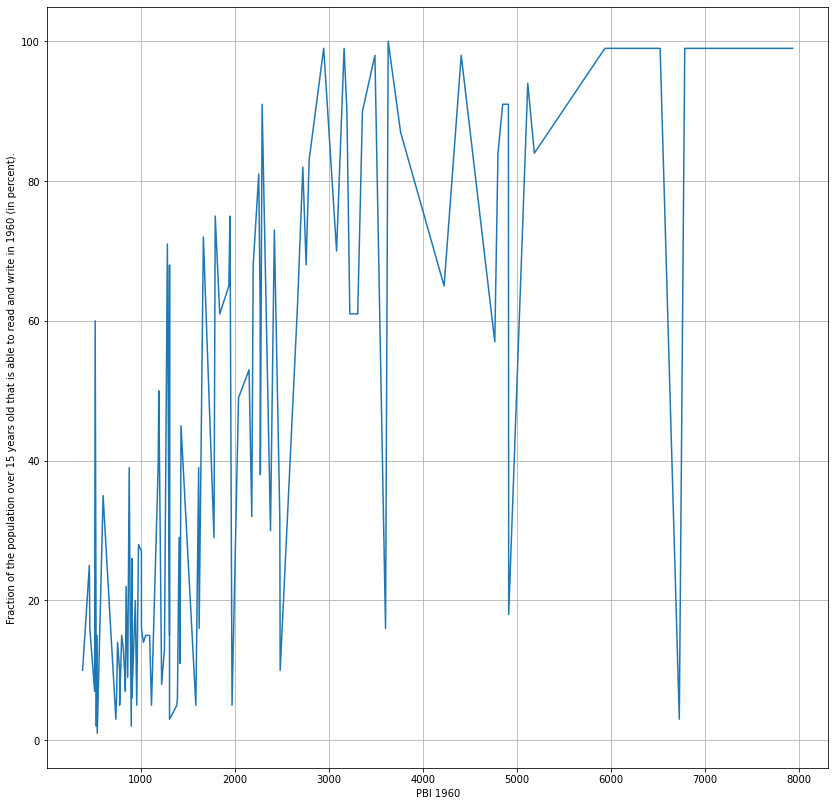

In [42]:
#Regresion lineal
import sklearn.linear_model
fig=plt.figure(figsize=(14,14))
df_out3=df_out2.sort_values('gdp60')
#plt.scatter(df_out3['gdp60'],df_out3['literacy60'])
plt.plot(df_out3['gdp60'],df_out3['literacy60'])
plt.xlabel('PBI 1960')
plt.ylabel('Fraction of the population over 15 years old that is able to read and write in 1960 (in percent).')
plt.grid()


In [ ]:
x=df_out2.iloc[:,[3,4,5,6,7,8]]
y=df_out2.iloc[:,4]

In [ ]:
eje_x=list(range(x.shape[0]))
eje_y=y

NameError: ignored

In [ ]:
p